# KNN on Product Selection

**Reading Data:**

  The given test and train arff files are converted into dataframes as shown below

In [1]:
import sys
sys.path.append('c:/users/lenovo/appdata/local/programs/python/python36-32/lib/site-packages')
import arff
import pandas as pd
#from io import StringIO
import numpy as np
dataset = arff.load(open('trainProdSelection.arff'))
data = pd.DataFrame(dataset['data'])
data2 = pd.DataFrame(dataset['attributes'])
data.columns=data2[0]
t_ds=arff.load(open('testProdSelection.arff'))
t_ds1=pd.DataFrame(t_ds['data'])
t_ds2=pd.DataFrame(t_ds['attributes'])
t_ds1.columns=t_ds2[0]
label2=pd.DataFrame()
label1=pd.DataFrame()

Now we seperated the labels from test and train data


In [2]:
label2['label']=t_ds1['label']
label2=list(label2['label'])
t_ds1=t_ds1.drop(['label'],axis=1)


label1=list(data['label'])
data=data.drop(['label'],axis=1)


Since we have two categorical variables we will encode them using ONE_HOT ENCODING

In [3]:
data=pd.get_dummies(data,'Type','LifeStyle')
t_ds1=pd.get_dummies(t_ds1,'Type','LifeStyle')

In [4]:
#data['label']=label1

we will define Normalization and KNN functions

In [5]:
def MinMaxScalar_Nrmlzn(ao,data):
    x=data[ao]
    x1=round((x-min(x))/(max(x)-min(x)),5)
    data[ao]=x1

In [6]:
import math
import operator

def euclideanDist(row_tr,row_te):
    d = 0.0
    for i in range(len(row_tr)):
        d+=pow((float(row_tr[i])-float(row_te[i])),2)
    d = math.sqrt(d)
    return d


def knn_predict(test_data, train_data, k_value,labels):
    op=[]
    pn=0
    for pn, row_test in test_data.iterrows():
        eu_Distance =[]
        knn = []
        c={}
        for jn, row_train in train_data.iterrows():
            eu_dist = euclideanDist(row_train,row_test)
            eu_Distance.append((labels[jn], eu_dist))
        eu_Distance.sort(key = operator.itemgetter(1))
        knn = eu_Distance[:k_value]
        for k in knn:
            if k[0] not in c:
                c[k[0]]=1
            else:
                c[k[0]]+=1
        
        sorted_d = list(c.items())
        d=pd.DataFrame(sorted_d)
        dFilter=d[d[1]==d[1].max()]
        fg = dFilter.sort_values(by = 0,ascending=True).head(1)
        op.append(fg[0].values[0])
                    
        
    return op
            
def accuracy(op,label):
    correct=0
    for i in range(len(label)):
        #print(i,"---------------------",op[i],"-------------",label2[i])
        if op[i] == label[i]:
            correct += 1
    accuracy = float(correct)/len(label) *100  #accuracy 
    return accuracy

Now we will normalize train and test data values

In [7]:
MinMaxScalar_Nrmlzn('Vacation',data)
MinMaxScalar_Nrmlzn('eCredit',data)
MinMaxScalar_Nrmlzn('salary',data)
MinMaxScalar_Nrmlzn('property',data)

In [8]:
MinMaxScalar_Nrmlzn('Vacation',t_ds1)
MinMaxScalar_Nrmlzn('eCredit',t_ds1)
MinMaxScalar_Nrmlzn('salary',t_ds1)
MinMaxScalar_Nrmlzn('property',t_ds1)

Now for different K values we will check on the test data

In [9]:
train_dataset=data
test_dataset=t_ds1
s=[]
for i in range(3,100,2):                            # Assumed K value
    op=knn_predict(t_ds1,data,i,label1)
    #print(op)
    o=accuracy(op,label2)
    s.append(o)


Now we will plot the test accuracy on it

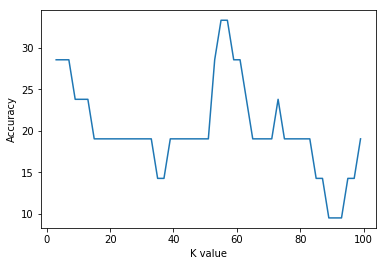

In [70]:
import matplotlib.pyplot as plt
plt.plot(range(3,100,2),s)
plt.ylabel('Accuracy')
plt.xlabel('K value')
plt.show()

**OBSERVATIONS:**


**Since we could see that the accuracy is changing with k,it could be possibly due to undefitting.So lets now do Crossvalidation.Now we will split the train into train and validation data**

In [46]:
data['label']=label1
#data_train=data.sample(frac=0.5,replace=True)
data_train=data
data_labels=data_train['label']
#data_train=data_train.drop('label',axis=1)

In [55]:
from sklearn.model_selection import train_test_split
label1=list(label1)
train_data,train_validn,class_data,class_validn=train_test_split(data_train,data_labels,random_state=1,test_size=0.08)
train_data=train_data.reset_index(drop=True)
train_validn=train_validn.reset_index(drop=True)
class_data=class_data.reset_index(drop=True)
class_validn=class_validn.reset_index(drop=True)

In [56]:
train_data=train_data.drop('label',axis=1)
train_validn=train_validn.drop('label',axis=1)

In [59]:
pi=[]
for i in range(3,50,2):                            # Assumed K value
    op=knn_predict(train_validn,train_data,i,class_data)
    #print(op)
    o=accuracy(op,class_validn)
    pi.append(o)

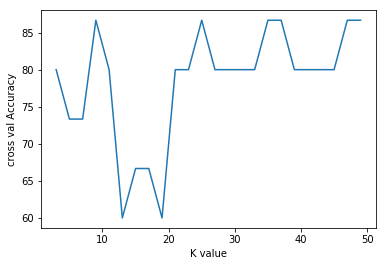

In [61]:
import matplotlib.pyplot as plt
plt.plot(range(3,50,2),pi)
plt.ylabel('cross val Accuracy')
plt.xlabel('K value')
plt.show()

**OBSERVATIONS :**

**From the graph above the cross validated accuracy is mostly around 80,which implies that model is good at  predicting the values of same distribution.Now lets test the model for test data**

In [65]:
si=[]
for i in range(3,50,2):                            # Assumed K value
    op=knn_predict(t_ds1,train_data,i,class_data)
    #print(op)
    o=accuracy(op,label2)
    si.append(o)

In [67]:
si

[28.57142857142857,
 28.57142857142857,
 28.57142857142857,
 23.809523809523807,
 28.57142857142857,
 28.57142857142857,
 28.57142857142857,
 23.809523809523807,
 33.33333333333333,
 23.809523809523807,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 14.285714285714285,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 28.57142857142857,
 28.57142857142857,
 33.33333333333333]

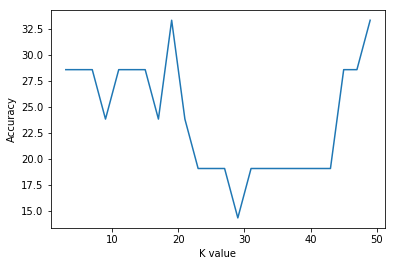

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(3,50,2),si)
plt.ylabel('Accuracy')
plt.xlabel('K value')
plt.show()

**OBSERVATIONS**

**We can find that the accuracy is 28 from k=3 to k=20 and the accuracy is at a maximum of 33.33 at 21 and also 50.**

**So we can see that the corresponding accuracy for k in the cross validated curve yeilded a maximum of 33.33 which means that the model may overfit.**

**But we can see that the distributions of the train and test are completely different because of which our model could not predict accurately.**

**Thus the possible solutions to avoid this problem are:**

**1.Training with more and more data**

**2.Nearly changing the distributions of test and train to  a same distribution**